In [1]:
import subprocess
import os
from src.hyperparameters import num_samples, train_images_path, train_labels_path, test_images_path, test_labels_path, valid_images_path, valid_labels_path, hyp_iou_files, train_epochs, train_batch_size, valid_batch_size, runs_directory
from src.visualize import display_sample, dataset_distribution, background_split, plot_results

original_dir = os.getcwd()
#Add packages to virtual environment - .\.venv\Scripts\activate

#Uncomment before running code
#%pip install -r requirements.txt

#Uncomment if any issues running the YOLOv5 model
#os.chdir("yolov5")
#%pip install -r requirements.txt


KeyboardInterrupt: 

Display a random sample of images with bounding boxes

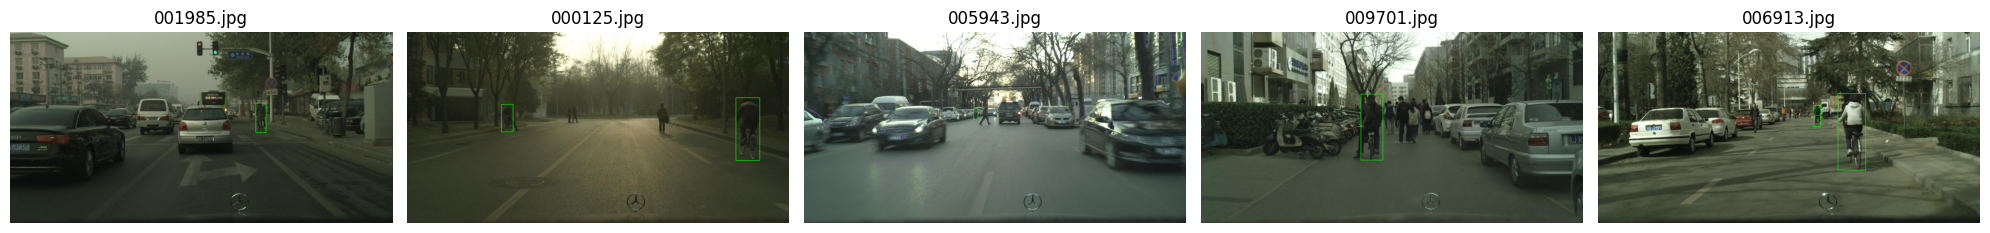

In [4]:
display_sample(num_samples, train_images_path, train_labels_path)

Display the distribution of train, validation, and test data

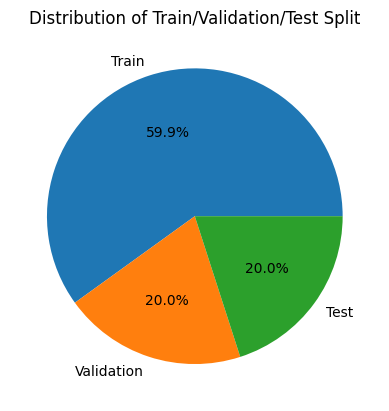

In [3]:
dataset_distribution(train_images_path, valid_images_path, test_images_path)

Display the amount of labelled vs unlabelled images

Train - Labelled: 719, Unlabelled: 200
Validation - Labelled: 249, Unlabelled: 58
Test - Labelled: 240, Unlabelled: 67


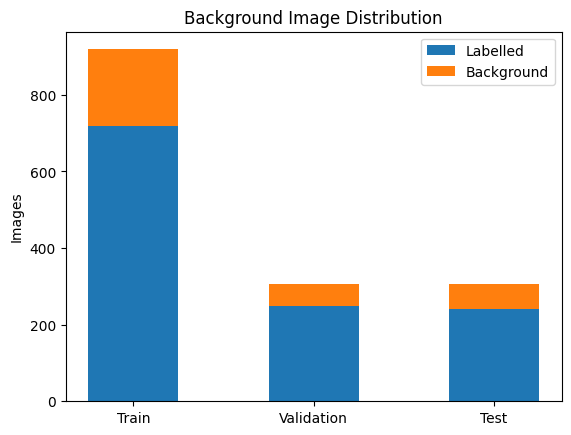

In [4]:
background_split(train_labels_path, valid_labels_path, test_labels_path)

In [2]:
os.chdir("yolov5")

for train_hyp_file in hyp_iou_files:
    yolov5_initialize_train = f'python train.py --img 1280 --batch {train_batch_size} --epochs {train_epochs} --data "data/cyclists.yaml" --cfg "yolov5n6.yaml" --weights "yolov5n6.pt" --project "train_cyclists" --name "{train_hyp_file}" --hyp "{train_hyp_file}"'
    print(f"Training with {train_hyp_file}")
    result = subprocess.run(yolov5_initialize_train, capture_output=True, text=True, encoding='utf-8', shell=True)
    # Print output
    print(result.stdout)
    if result.stderr:
        # Print errors
        print("Errors:", result.stderr)

os.chdir(original_dir)

Training with hyp_iou_1.yaml


Validate the model with unseen data

In [ ]:
os.chdir("yolov5")

for valid_hyp_file in hyp_iou_files:
    yolov5_initialize_train = f'python val.py --img 1280 --batch {valid_batch_size} --data "data/cyclists.yaml" --weights "train_cyclists/{valid_hyp_file}/weights/best.pt" --task test --project "train_cyclists" --name "{valid_hyp_file}_validate" --augment'
    print(f"Validating with {valid_hyp_file}")
    result = subprocess.run(yolov5_initialize_train, capture_output=True, text=True, encoding='utf-8', shell=True)
    # Print output
    print(result.stdout)
    if result.stderr:
        # Print errors
        print("Errors:", result.stderr)

os.chdir(original_dir)

[0.85577, 0.8574, 0.86123, 0.85645, 0.86014, 0.86299]


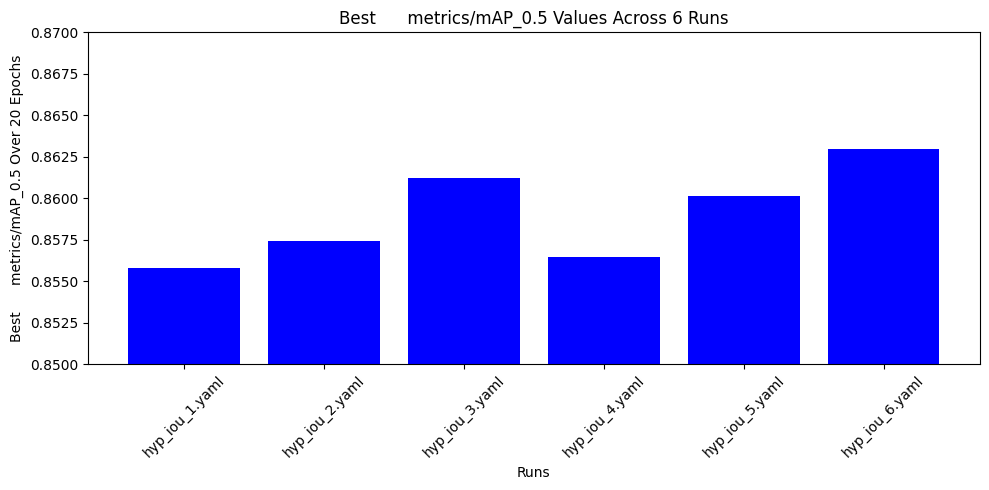

In [2]:
plot_results(runs_directory, hyp_iou_files)